In [2]:
import pandas as pd
import numpy as np
winkelr = pd.read_excel("md_winkelrichtgröße.xlsx")
winkelr = winkelr.iloc[:,:]
#print(lange_spule.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))
print(winkelr)
mittelwert = np.mean(winkelr)
#print(mittelwert)

def winkelricht(F, r, phi): #Phi in Winkel
    D = (F*r) / (phi * (np.pi) / 180)
    return D

arr = pd.DataFrame(winkelr).to_numpy()
phi = arr[:,0]
F = arr[:,1]

D = winkelricht(F,0.2,phi)
D = np.transpose(D)
mittelwertD = np.mean(D)
standartabw = np.std(D)
print(mittelwertD)
print(standartabw)
#np.savetxt('WinkelrichtgrößeWerte.txt', D, fmt='%f')

    \phi / \ang{}  F / \newton
0              20        0.022
1              30        0.054
2              40        0.077
3              50        0.092
4              60        0.120
5              70        0.144
6              80        0.162
7              90        0.188
8             100        0.190
9             110        0.200
10            120        0.230
0.021325364366313267
0.002952928161464375


In [3]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

abstand = pd.read_excel("md_eigenträgheitsmoment.xlsx")
abstand = abstand.iloc[:,:]
#print(abstand.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))
arr = pd.DataFrame(abstand).to_numpy()

arr2  = np.square(arr)
r2 = arr2[:,0]
T2 = arr2[:,1]
arr = np.c_[arr, r2, T2]

arr =  pd.DataFrame(data=arr)
print(arr.to_latex(index = False, column_format= "c c c c", na_rep = "-", float_format="%.3f"))


\begin{tabular}{c c c c}
\toprule
    0 &     1 &     2 &      3 \\
\midrule
0.050 & 2.750 & 0.003 &  7.562 \\
0.075 & 3.100 & 0.006 &  9.610 \\
0.100 & 3.800 & 0.010 & 14.440 \\
0.125 & 4.100 & 0.016 & 16.810 \\
0.150 & 4.750 & 0.022 & 22.562 \\
0.175 & 5.300 & 0.031 & 28.090 \\
0.200 & 5.800 & 0.040 & 33.640 \\
0.225 & 6.600 & 0.051 & 43.560 \\
0.250 & 7.150 & 0.062 & 51.123 \\
0.275 & 7.800 & 0.076 & 60.840 \\
\bottomrule
\end{tabular}



a = 724.885 ± 10.115
b = 5.945 ± 0.400


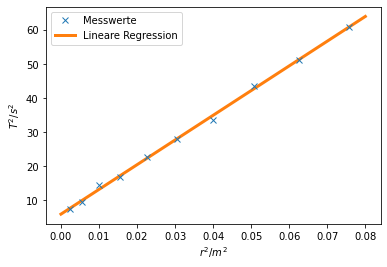

In [4]:
# Lineare Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
np.set_printoptions(suppress=True)

#Daten
abstand = pd.read_excel("md_eigenträgheitsmoment.xlsx")
abstand = abstand.iloc[:,:]
arr = pd.DataFrame(abstand).to_numpy()
arr2  = np.square(arr)
r2 = arr2[:,0]
T2 = arr2[:,1]

#Ausgleichsrechnung

params, covariance_matrix = np.polyfit(r2, T2, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.3f} ± {error:.3f}')


x_plot = np.linspace(0, 0.08)
plt.plot(r2,T2,'x', label="Messwerte", zorder=2)
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=3,
    zorder=1,
)
plt.xlabel(r'$r^2 / m^2$')
plt.ylabel(r'$T^2 / s^2$')
plt.legend(loc="best")

#Speichern des Plots (und überprüfen ob schon vorhanden)
path = '/pictures/'
if os.path.exists('Lineare Regression.pdf'):
    os.remove('Lineare Regression.pdf')
plt.savefig('pictures/Lineare Regression.pdf')

In [17]:
# Berechnung vom Eigenträgheitsmoment
mklZyl = 0.0624 # kg
D = 0.021
Dfehler = 0.00295
b = 5.945
bfehler = 0.4


def eigtraeg(b, r, h, m, D):
    rtn = ((b * D) / ((np.pi)**2 *  4)) - m * ((3 * r**2 + h**2) / 6)
    return rtn

def fehlereigtraeg(b, D, deltaD, deltaB):
    rtn = np.sqrt(((b * deltaD)/(4* np.pi**2))**2 + ((D * deltaB)/ (4 * np.pi**2))**2)
    return rtn

print(eigtraeg(b, 0.225, 0.023, mklZyl, D))

print(fehlereigtraeg(b, D, Dfehler, bfehler))

0.0015773591929569152
0.000492563659090626


In [6]:
import pandas as pd
import numpy as np
zylper = pd.read_excel("md_periodendauer_zylinder.xlsx")
zylper = zylper.iloc[:,:]
#print(zylper.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))

arr = pd.DataFrame(zylper).to_numpy()
Twerte = arr[:,1]
print("Mittelwert: ", np.mean(Twerte))
print("Standartabweichung: ", np.std(Twerte))

# Berechnung des Trägheitsmomentes

D = 0.021
def Izyl(T):
    rtn = (T**2 * D) / (4 * (np.pi)**2)
    return rtn

print(Izyl(0.758) * 10**4)

def fehlderIZyl(D, deltaD, T, deltaT):
    rtn = np.sqrt((2 * D * T * deltaT)**2 / (4 * np.pi)**2 + (T**2 * deltaD)**2 / (4 * np.pi)**2)
    return rtn

print (fehlderIZyl(D, 0.00295, 0.758, 0.02357) * 10**4)

Mittelwert:  0.7580000000000001
Standartabweichung:  0.02357965224510321
3.0563139893094986
1.4750761845981664


In [7]:
import pandas as pd
import numpy as np
kugper = pd.read_excel("md_periodendauer_kugel.xlsx")
kugper = kugper.iloc[:,:]
#print(kugper.to_latex(index = False, column_format= "c c", na_rep = "-", float_format="%.3f"))

arr = pd.DataFrame(kugper).to_numpy()
Twerte = arr[:,1]
#print("Mittelwert: ", np.mean(Twerte))
#print("Standartabweichung: ", np.std(Twerte))

# Berechnug des Trägheitsmomentes Kugel

D = 0.021
def Ikug(T):
    rtn = (T**2 * D) / (4 * (np.pi)**2)
    return rtn

print(Ikug(1.842) * 10**3)

def fehlderIZyl(D, deltaD, T, deltaT):
    rtn = np.sqrt((2 * D * T * deltaT)**2 / (4 * np.pi)**2 + (T**2 * deltaD)**2 / (4 * np.pi)**2)
    return rtn

print (fehlderIZyl(D, 0.00295, 1.842, 0.044) * 10**3)

1.804840424813165
0.8413122322463072


In [8]:
#Abmessungen Puppe

import pandas as pd
import numpy as np
puppeabm = pd.read_excel("md_abmessung_puppe.xlsx")
#puppeabm = puppeabm.iloc[:,5:]
#print(puppeabm.to_latex(index = False))

arr = pd.DataFrame(puppeabm).to_numpy()
Maße = arr[1:,1:]
mittelarr = np.zeros(2)
for i in range(7):
    #print("Mittelwert: ", np.mean(Maße[:,i]))
    #print("Standartabweichung: ", np.std(Maße[:,i]))
    vec = [np.mean(Maße[:,i]), np.std(Maße[:,i])]
    mittelarr = np.c_[mittelarr, vec]

mittelarr = mittelarr[:,1:]
mittelarr =  pd.DataFrame(data=mittelarr)
print(mittelarr.to_latex(index = False, float_format="%.3f"))


\begin{tabular}{rrrrrrr}
\toprule
    0 &     1 &     2 &     3 &     4 &     5 &     6 \\
\midrule
1.710 & 1.498 & 1.294 & 1.306 & 3.938 & 3.746 & 2.676 \\
0.109 & 0.157 & 0.063 & 0.081 & 0.373 & 0.849 & 0.245 \\
\bottomrule
\end{tabular}



In [9]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
################################################# Jetzt wirds eklig ########################################################
############################################# Volumenberechnung der Gliedmaßen #############################################

# Formeln

def volzyl(r,h):                                    #Volumen Zylinder
    rtn  = np.pi * r**2 * h
    return rtn

def fehlervolzyl(r, h, rabw):                       #Fehler vom Volumen des Zylinders
    feh = np.sqrt((2 * np.pi * h * r * rabw)**2)
    return feh

def volkug(r):                                      #Volumen Kugel
    rtn = (4/3) * np.pi * r**3
    return rtn

def fehlervolkug(r, rabw):                          #Fehler vom Volumen der Kugel
    feh = np.sqrt((4 * np.pi * r**2 * rabw)**2)
    return feh

#Daten importierten

import pandas as pd
import numpy as np
puppeabm = pd.read_excel("md_abmessung_puppe.xlsx")



arr = pd.DataFrame(puppeabm).to_numpy()
Maße = arr[1:,1:]


mittelarr = np.zeros(2)
for i in range(7):              #Mittelwerte errechnen
    vec = [np.mean(Maße[:,i]), np.std(Maße[:,i])]
    mittelarr = np.c_[mittelarr, vec]


mittelarr = mittelarr[:,1:]             # Überflüssige Zeile loswerden
mittelarr = mittelarr * 10**(-2)        # In Meter umwandeln
mittelarr = mittelarr / 2               # Durchmesser zu Radius umwandeln

#mittelarr =  pd.DataFrame(data=mittelarr)              # Für die Tabelle (Radius)
#print(mittelarr.to_latex(index = False), np.set_printoptions(suppress=False))



hvec = [0.1433, 0.1433, 0.1302, 0.1302, 0.0981, 0.0981, 0.0471]     # Die Länge/Höhe der GANZEN Gliedmaßen

V1 = np.zeros(1)        # Basis für Volumen
Vfeh  = np.zeros(1)     # Basis für Fehler des Volumen
for i in range(np.size(hvec) - 1):      # Berechnung der Volumen und Fehler mit den Mittelwerten, -1 da letztes Element Kugelradius
    V1 = np.c_[V1, volzyl(mittelarr[0,i], hvec[i] / 2)]     
    Vfeh = np.c_[Vfeh, fehlervolzyl(mittelarr[0,i], hvec[i] / 2, mittelarr[1,i])]
V1 = V1[:,1:]       #Loswerden der überflüssigen Zeile
Vfeh = Vfeh[:,1:]   #Loswerden der überflüssigen Zeile

vec = np.concatenate((V1, Vfeh), axis=0)            # vec ist jetzt also in der ersten Zeile Mittelwert, zweite Zeile Standartabw

vec =  pd.DataFrame(data=vec)
vec = vec * 10**6                     # Umrechnen in mm^3 ? 
#print(vec.to_latex(index = False), np.set_printoptions(suppress=False))

############################################################################################################################
#Volumen Kopf

Vkopf = volkug(mittelarr[0,6])
Vkopffeh = fehlervolkug(mittelarr[0,6], mittelarr[1,6])
#print(Vkopf * 10**6)
#print(Vkopffeh * 10**6)


# Gesamtvolumen bestimmen
Vges = Vkopf + np.sum(V1)
#print(Vges * 10**6)

# Fehler des Gesamtvolumen bestimmen
fehler = 0
for i in range(np.size(hvec) - 1):              # Fehler der Zylinder
    if i in [0,1,2,3]:
        fehler = fehler + 4 * (fehlervolzyl(mittelarr[0,i], hvec[i], mittelarr[1,i]))**2    #Fehler der Gliedmaßen
    else:
        fehler = fehler + (fehlervolzyl(mittelarr[0,i], hvec[i], mittelarr[1,i]))**2        #Fehler der "einzelnen" Körperteile

fehler = fehler + (fehlervolkug(mittelarr[0,6], mittelarr[1,6]))**2                         # Fehler des Kopfes
fehler = np.sqrt(fehler)                                                                    # Wurzel ziehen
#print(fehler * 10**6)


##################### Anteile am Körpe berechnen ########################
def AKörper(VKörpert):
    AKörp = VKörpert / 170.199
    return AKörp

def fehlerAKörper(VKörpert, deltaVKörpert):
    rtn = np.sqrt((1 / 170.199)**2 * (deltaVKörpert)**2 + (VKörpert * 55.954 / 170.199**2)**2)
    return rtn



Mges = 0.1079
## Anteile der Körperteile ohne Kopf
#for i in range(np.size(hvec) - 1):
#    print(AKörper(V1[0,i] * 10**6))
#
#print(AKörper(Vkopf) * 10**6)

# Fehler der Anteile
#for i in range(np.size(hvec) - 1):
#    print(fehlerAKörper(V1[0,i] * 10**6, Vfeh[0,i] * 10**6))

#print(fehlerAKörper(Vkopf, Vkopffeh) * 10**6)


# Massenanteile der Körperteile ohne Kopf
#for i in range(np.size(hvec) - 1):
#    print(AKörper(V1[0,i] * 10**6) * Mges)
#print(AKörper(Vkopf) * 10**6 * Mges)

# Fehler der Anteile
#for i in range(np.size(hvec) - 1):
#    print(fehlerAKörper(V1[0,i] * 10**6, Vfeh[0,i] * 10**6) * Mges)
#
#print(fehlerAKörper(Vkopf, Vkopffeh) * 10**6 * Mges)


In [10]:
# Messung der Puppe

import pandas as pd
import numpy as np

# Pose 1
pose1 = pd.read_excel("md_periodendauer_puppe_rechter_winkel.xlsx")
pose1 = pose1.iloc[:,1:]
#print(pose1.to_latex(index = False))

pose1 =  pd.DataFrame(data=pose1).to_numpy()
pose1alle = pose1.flatten()
#print(np.mean(pose1alle))
#print(np.std(pose1alle))

#mittelpose1 = np.mean(pose1)
#print(mittelpose1)

# Pose 2
pose2 = pd.read_excel("md_periodendauer_puppe_tpose.xlsx")
pose2 = pose2.iloc[:,1:]
#print(pose2.to_latex(index = False))

pose2 =  pd.DataFrame(data=pose2).to_numpy()
print(np.mean(pose2))
pose2alle = pose2.flatten()
print(np.mean(pose2alle))
print(np.std(pose2alle))

mittelpose2 = np.mean(pose2)
print(mittelpose2)

0.678
0.678
0.022715633383201067
0.678


Trägheitsmomente der Puppe in verschiedenen posen berechnen

In [11]:
puppeabm = pd.read_excel("md_abmessung_puppe.xlsx")
arr = pd.DataFrame(puppeabm).to_numpy()
Maße = arr[1:,1:]

mittelarr = np.zeros(2)
for i in range(7):              #Mittelwerte errechnen
    vec = [np.mean(Maße[:,i]), np.std(Maße[:,i])]
    mittelarr = np.c_[mittelarr, vec]
mittelarr = mittelarr[:,1:]             # Überflüssige Zeile loswerden
mittelarr = mittelarr * 10**(-2)        # In Meter umwandeln
mittelarr = mittelarr / 2               # Durchmesser zu Radius umwandeln

# Längen der Körper
hvec = [0.1433, 0.1433, 0.1302, 0.1302, 0.0981, 0.0981, 0.0471] # [3] ist Index für gesamten Arm

# Massen und Radien
mos = 0.01043 ; ros = mittelarr[0,0]
mus = 0.008 ; rus = mittelarr[0,1]
moa = 0.00542 ; roa = mittelarr[0,2]
mua = 0.00552 ; rua = mittelarr[0,3]
mok = 0.03787 ; rok = mittelarr[0,4]
mbauch = 0.03427 ; rbauch = mittelarr[0,5]
mkopf = 0.00636 ; rkopf = mittelarr[0,6]

# Trägheitsmoment Torso und Kopf
iok = mok * rok**2 / 2
iuk = mbauch * rbauch**2 / 2
ikopf = (2/5) * mkopf * rkopf**2


#####################################
# Trägheitsmomente bestimmen, Pose 1
ios = 0.5 * (mos * ros**2) + mos * ros**2
ius = 0.5 * (mus * rus**2) + mus * rus**2
ioa = (1/3) * moa * (hvec[3] / 2)**2 + moa * rok**2
iua = (1/3) * mua * (hvec[3] / 2)**2 + mua * (rok + (hvec[3]) / 2)**2

iges1 = iok + iuk + ikopf + 2 * (ios + ius + ioa + iua)
print(iges1 * 10**3)

#####################################
# Trägheitsmomente bestimmen, Pose 2
ios = (1/3) * (mos * (hvec[0] / 2)**2) # hvec[0] ist Oberschenkel
ius = (1/3) * (mus * (hvec[0] / 2)**2) + mus * (hvec[0] / 2)**2
ioa = (1/3) * moa *  + moa * rok**2
iua = (1/3) * mua * (hvec[3] / 2) + mua * (rok + (hvec[3]) / 2)**2

iges2 = iok + iuk + ikopf + 2 * (ios + ius + ioa + iua)
print(iges2 * 10**3)

0.1319236265816
0.47796949149307477
